# Muhamad Gatot Supiadin
## M183X0343 | M01 - Pengembangan Machine Learning dan Front End Web
Universitas Amikom Yogyakarta , Sleman Yogyakarta

**Import Libaries**

In [8]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

**Collecting Dataset**

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadgatot","key":"1fd992169d598ee1ffc8635e9a98b5b0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d varpit94/google-stock-data

  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 68.6MB/s]


In [4]:
!unzip '/content/google-stock-data.zip'

Archive:  /content/google-stock-data.zip
  inflating: GOOGL.csv               


In [6]:
import pandas as pd

In [9]:
df = pd.read_csv('GOOGL.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [17]:
df['Volume'] = df['Volume'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   float64
dtypes: float64(6), object(1)
memory usage: 242.4+ KB


# **Exploratory Data Analysis (EDA)**
**Description of variable** 


1.   Date : Opening rekap data
2.   High : Highest price per day
3.   Low  : Lowest price per day
4.   Open : Opening price per day
5.   Close  : Closing price per day
6.   Adj Close : Closing price per day after counting stock split or stock reverse
6.   Volume : Volume Transaction price per day


In [11]:
print(f'The data has {df.shape[0]} records and {df.shape[1]} columns.')

The data has 4431 records and 7 columns.


**Pengecekan Missing Value**

In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
print('Jumlah data yang null adalah ', df.isnull().sum().sum(), ' records')

Jumlah data yang null adalah  0  records


# **Statistic Dataset Information**


* count adalah jumlah sampel pada dataset.
* mean adalah nilai rata-rata dataset.
* std adalah standar deviasi.
* min adalah nilai minimum.
* 25% adalah kuartil pertama.
* 50% adalah kuartil kedua.
* 75% adalah kuartil ketiga.
* max adalah nilai maksimum

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


# **Data Visulaisation**

Untuk mengecek apakah ada outliers pada dataset

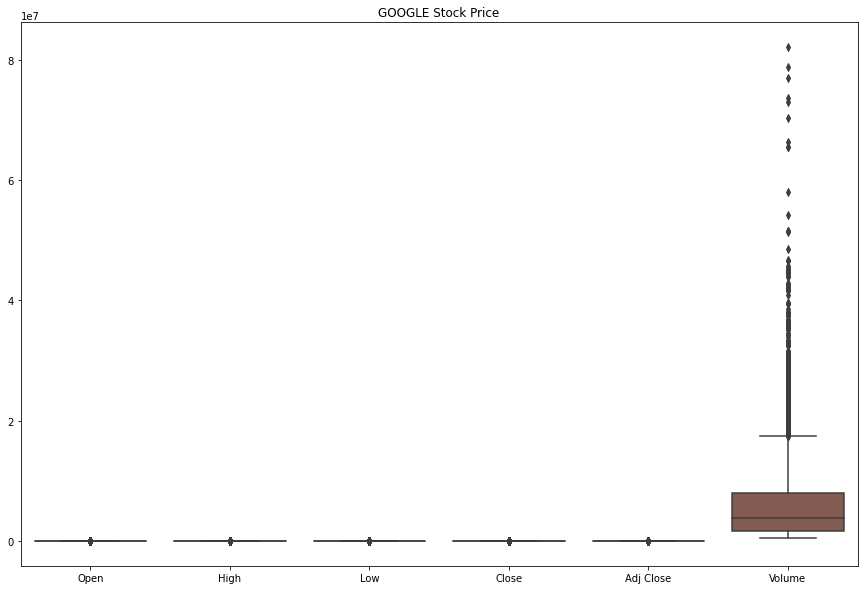

In [19]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(15,10))
sns.boxplot(data=df[numerical_col]).set_title("GOOGLE Stock Price")
plt.show()

Terlihat pada kolom Volume. Mengatasi outliner pada data menggunakan IQR Method dengan cara menghapus data yang berada diluar daripada IQR.

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(3861, 7)

In [21]:
print(f'Data consist of {df.shape[1]} columns')
print(f'Each column consists of {df.shape[0]} records')

Data consist of 7 columns
Each column consists of 3861 records


Data diatas merupakan data yang sudah clean dari outliner

Berikut merupakan **Visualisasi data** dari dataset yang tidak memiliki outliner

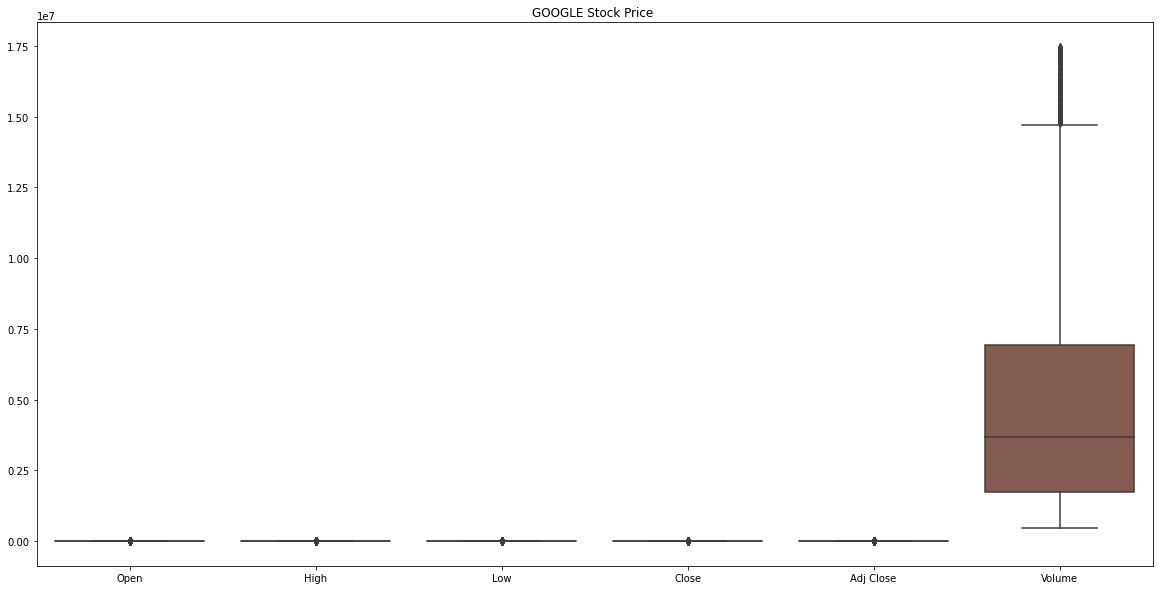

In [23]:
numerical_data = [col for col in df.columns if df[col].dtype == 'float64']
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical_data]).set_title('GOOGLE Stock Price ')
plt.show()

# **Univariate Analysis**
kolom yang ditargetkan adalah kolom 'Adj Close'

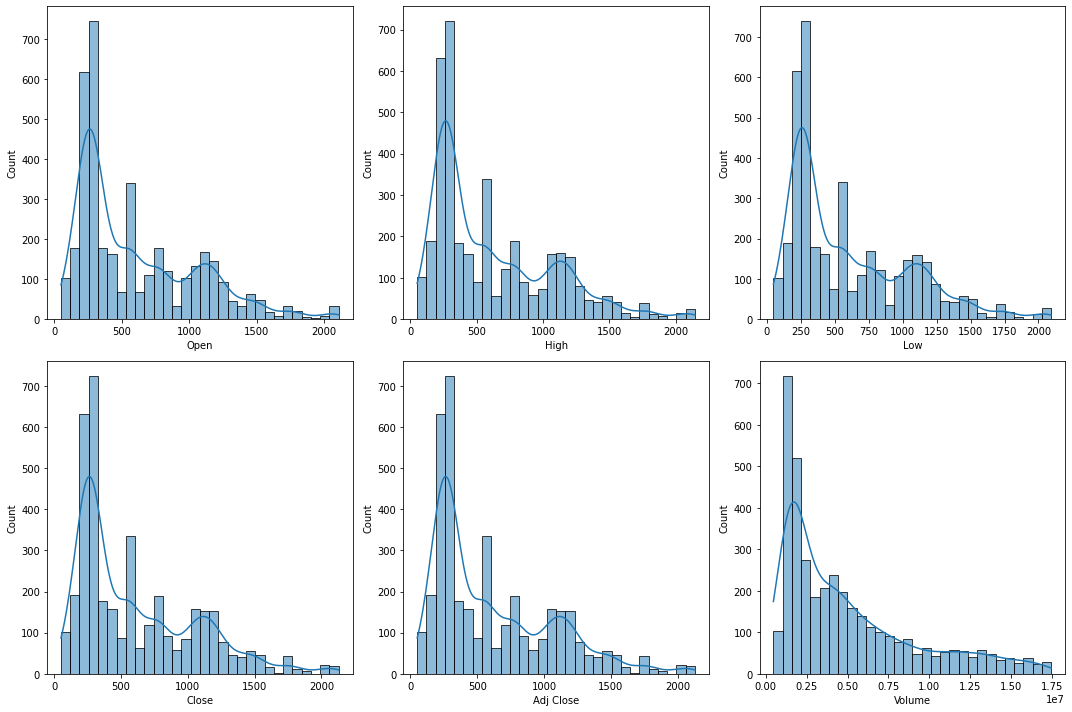

In [24]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

# **Multivariate Analysis**
Setelah menargetkan kolom Adj Close, sekarang kita coba mengkorelasikan Adj Cluse terhadap fitur lain lalu kita simpulkan

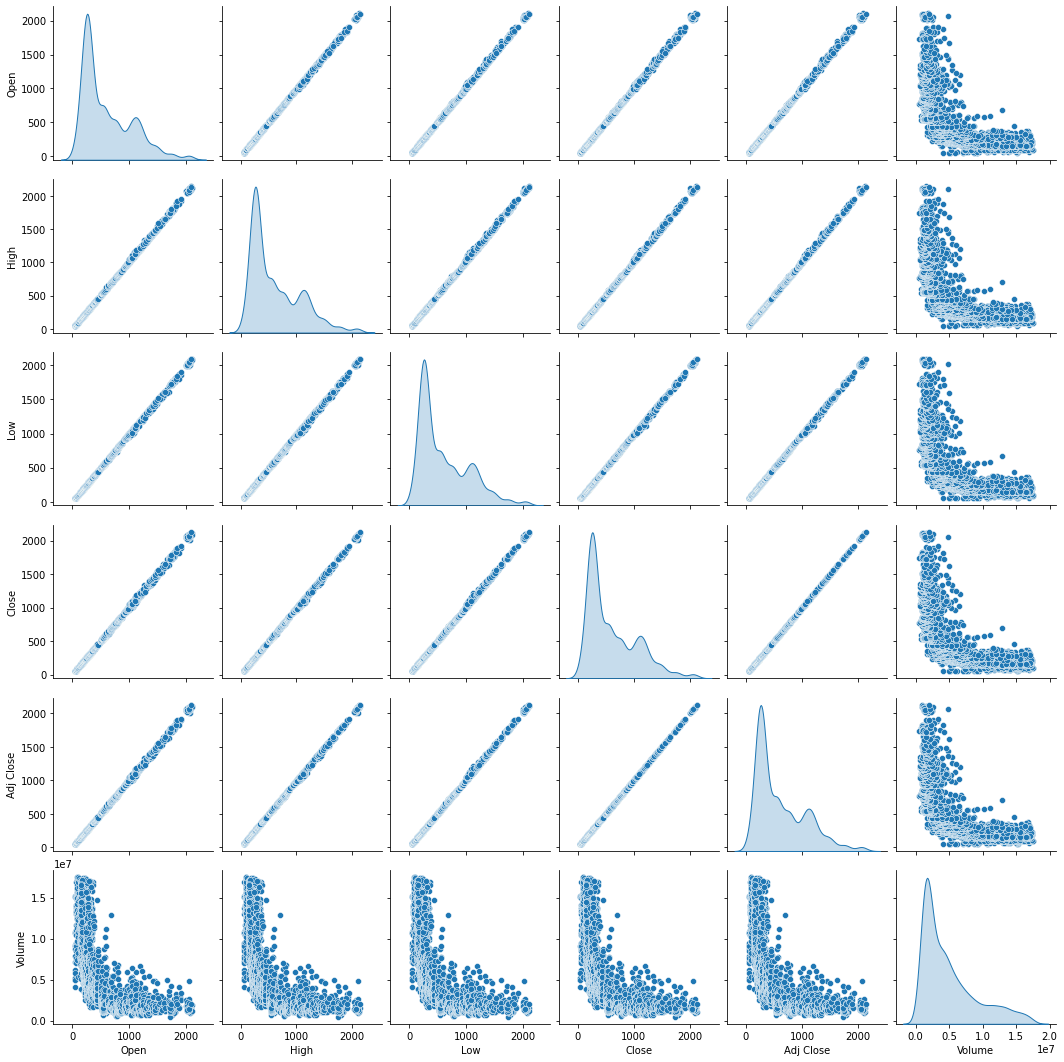

In [25]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

Dari data diatas dapat disimpulkan bahwa Adj Close memiliki korelasi positif yang kuat terhadap Open, High, Low dan Close. sedangkan pada kolom Volume memiliki korelasi yang tidak kuat


**Korelasi Heatmap**

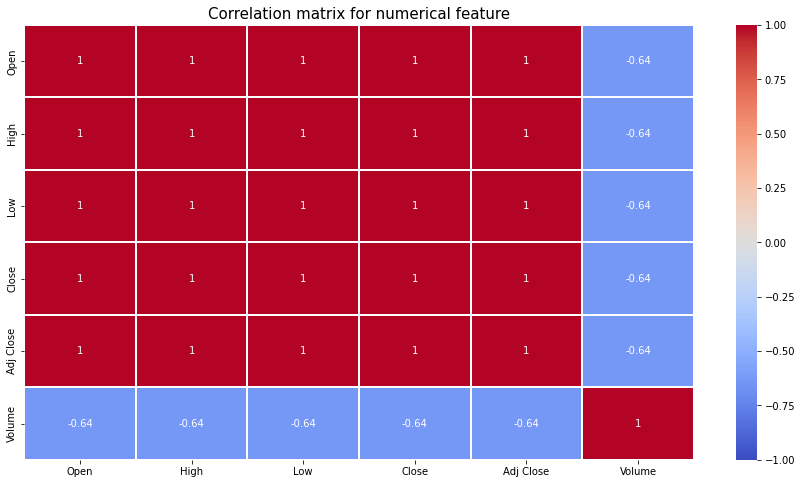

In [26]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

Pada proses Training model kita akan menghapus atau gunakan fungsi drop() untuk menghilangkan kolom yang akan mengganggu proses training model

In [27]:
GOOGL = df.drop(['Date', 'Volume', 'Close'], axis=1)
GOOGL.head()

,Open,High,Low,Adj Close
3,55.675674,55.855858,51.836838,52.487488
4,52.532532,54.054054,51.991993,53.053055
5,52.527527,54.029030,52.382381,54.009010
6,54.104103,54.364365,52.897900,53.128128
7,52.692692,52.797798,51.056057,51.056057


# **Splitting Data**

In [28]:
X = GOOGL.iloc[:, :-1].values
y = GOOGL.iloc[:, -1].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [30]:
print('X_train has', len(X_train), 'records')
print('y_train has', len(y_train), 'records')
print('X_test has', len(X_test), 'records')
print('y_test has', len(y_test), 'records')

X_train has 3088 records
y_train has 3088 records
X_test has 773 records
y_test has 773 records


# **Normalization**
Untuk mempercepat training data kita akan normalisasikan dataset dimana nanti data akan diubah diantara rentan 0 hingga 1 menggunakan Minmaxscaler()

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'],
                      index=['SVR', 'KNN', 'GradientBoosting'])

# **Modelling**
Pada tahap ini kita menggunakan Hyperparameter tunning, dimana akan menambah model secara otomatis agar mencapai model terbaiknya.
kitapun dapat mengaturnya secara manual menggunakan GridSearch, dimana teknik ini akan menguji hyperparameter sekaligus pada model

In [33]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [34]:
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
0.999853116277378


In [35]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 3}
0.9998259738961025


In [36]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [250, 500, 750, 1000],
    'criterion': ['friedman_mse', 'squared_error']
}

gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(X_train, y_train)
print(gradient_boost_search.best_params_)
print(gradient_boost_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 1000}
0.9998190030651932


# **Fitting Model**
Disini kita akan menggunakan 3 buah algoritma diantarnya SVR, KNN dan Gradient Boost.

In [37]:
svr = SVR(C=1000, gamma=0.003, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=1000, gamma=0.003)

In [38]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [40]:
gradient_boost = GradientBoostingRegressor(criterion='squared_error',
                                           learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=1000)

# **Model Evaluation**
Setelah menerapkan algritma pada model, selanjutnya kita bisa melihat MSE mana yang terkecil dari ketiga algortma yang dipakai

In [41]:
model_dict = {
    'SVR': svr,
    'KNN': knn,
    'GradientBoosting': gradient_boost,
    
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,45.265114,52.939549
KNN,23.22933,44.07582
GradientBoosting,13.058244,44.985707


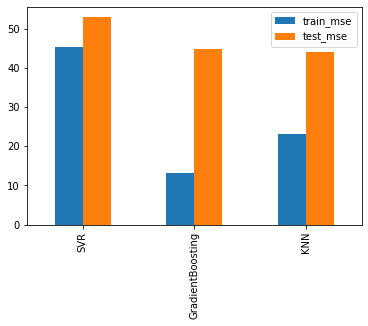

In [42]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)

Pada Visual diatas bisa kita liat bahwa algoritma KNN adalah algortima yang memberikan MSE terendah, untuk lebih jelasnya kita akan mencari akurasi pada setiap algortma dengan bantuan score()

In [43]:
svr_acc = svr.score(X_test, y_test)*100
knn_acc = knn.score(X_test, y_test)*100
boosting_acc = gradient_boost.score(X_test, y_test)*100

In [44]:
evaluation_list = [[svr_acc], [knn_acc], [boosting_acc]]
evaluation = pd.DataFrame(evaluation_list,
                          columns = ['Accuracy (%)'],
                          index = ['SVR', 'KNN', 'Gradient Boost'])

evaluation

,Accuracy (%)
SVR,99.972064
KNN,99.976741
Gradient Boost,99.976261


dari hasil evaluasi menunjukan bahwa KNN merupakan algortima terbaik untuk model

# **Forecasting Price**
pada proses ini kita akan coba memprediksikan harga dari saham GOOGLE dalam kurun waktu sebulan kedepan 

In [51]:
X_30=X[-30:]
forecast=knn.predict(X_30)

In [52]:
forecast=pd.DataFrame(forecast,columns=['Forecast'])
GOOGLE = GOOGL.append(forecast)
GOOGLE.drop(['High', 'Low', 'Open'],axis=1,inplace=True)

In [53]:
GOOGLE.tail(35)

,Adj Close,Forecast
4179,2024.729980,NaN
4180,2045.790039,NaN
4181,2046.469971,NaN
4182,2062.520020,NaN
4183,2129.780029,NaN
0,NaN,2106.373372
1,NaN,2106.373372
2,NaN,2106.373372
3,NaN,2106.373372
4,NaN,2106.373372
